# TP3 - Pregunta 2: Detección Múltiple de Logos

## Objetivo
Plantear y validar un algoritmo para **múltiples detecciones** en la imagen `coca_multi.png` utilizando el mismo template de la pregunta 1.

## Metodología
- Algoritmo optimizado para detectar múltiples instancias del logo
- Configuración específica para `coca_multi.png`
- Clustering de detecciones para agrupar resultados similares
- Visualización con bounding boxes y niveles de confianza

## 1. Importación de librerías y configuración

In [8]:
import os
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Importar módulos locales
from template_matching_lib.config import crear_config_dict
from template_matching_lib.preprocessing import cargar_template
from template_matching_lib.utils import procesar_imagen_multi, crear_directorio_resultados

print("Librerías importadas correctamente")
print(f"OpenCV version: {cv2.__version__}")

Librerías importadas correctamente
OpenCV version: 4.12.0


## 2. Configuración del experimento para detección múltiple

In [9]:
# Crear configuración para detección múltiple
config = crear_config_dict('multi')

print("Configuración para detección múltiple:")
print(f"- Directorio de imágenes: {config['PATH_IMAGENES']}")
print(f"- Directorio de template: {config['PATH_TEMPLATE']}")
print(f"- Rango de escalas: {config['ESCALA_MIN']} a {config['ESCALA_MAX']}")
print(f"- Paso de escala: {config['PASO_ESCALA']}")
print(f"- Umbral de detección: {config['UMBRAL_DETECCION']}")
print(f"- Umbral IOU para NMS: {config['UMBRAL_IOU_NMS']}")
print(f"- Límite de detecciones finales: {config['LIMITE_FINAL']}")
print(f"- EPS para clustering: {config['CLUSTERING_EPS']}")
print(f"- Umbral confianza normalizada: {config['UMBRAL_CONFIANZA_NORMALIZADA']}")
print(f"- Directorio de resultados: {config['CARPETA_RESULTADOS']}")

# Crear directorio de resultados
crear_directorio_resultados(config)

Configuración para detección múltiple:
- Directorio de imágenes: TP3/images/
- Directorio de template: TP3/template/
- Rango de escalas: 0.24 a 0.25
- Paso de escala: 0.01
- Umbral de detección: 0.05
- Umbral IOU para NMS: 0.2
- Límite de detecciones finales: 50
- EPS para clustering: 15
- Umbral confianza normalizada: 0.6
- Directorio de resultados: resultados_canny_multi


## 3. Carga del template

Cargando template desde: TP3/template/pattern.png
Template cargado exitosamente
Dimensiones del template original: (175, 400, 3)
Dimensiones del template con Canny: (175, 400)


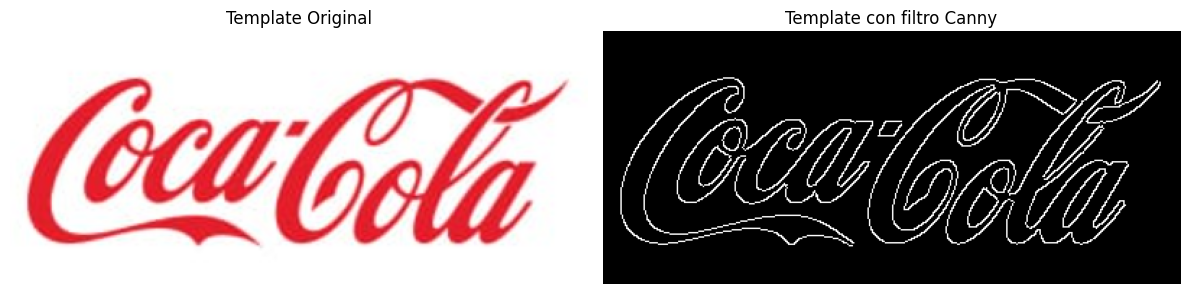

In [10]:
# Cargar el mismo template de la pregunta 1
template_path = f"{config['PATH_TEMPLATE']}pattern.png"
print(f"Cargando template desde: {template_path}")

# Cargar template original
template_original = cv2.imread(template_path)
if template_original is None:
    raise ValueError(f"No se pudo cargar el template desde {template_path}")

# Cargar template procesado
template_canny = cargar_template(template_path, config)

print(f"Template cargado exitosamente")
print(f"Dimensiones del template original: {template_original.shape}")
print(f"Dimensiones del template con Canny: {template_canny.shape}")

# Visualizar el template
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].imshow(cv2.cvtColor(template_original, cv2.COLOR_BGR2RGB))
axes[0].set_title('Template Original')
axes[0].axis('off')

axes[1].imshow(template_canny, cmap='gray')
axes[1].set_title('Template con filtro Canny')
axes[1].axis('off')

plt.tight_layout()
plt.show()

# Crear diccionario para compatibilidad con el resto del código
template_data = {
    'template': template_original,
    'template_canny': template_canny
}

## 4. Verificación de la imagen coca_multi.png

Buscando imagen: TP3/images/coca_multi.png
✓ Imagen coca_multi.png encontrada
Dimensiones de la imagen: (598, 799, 3)


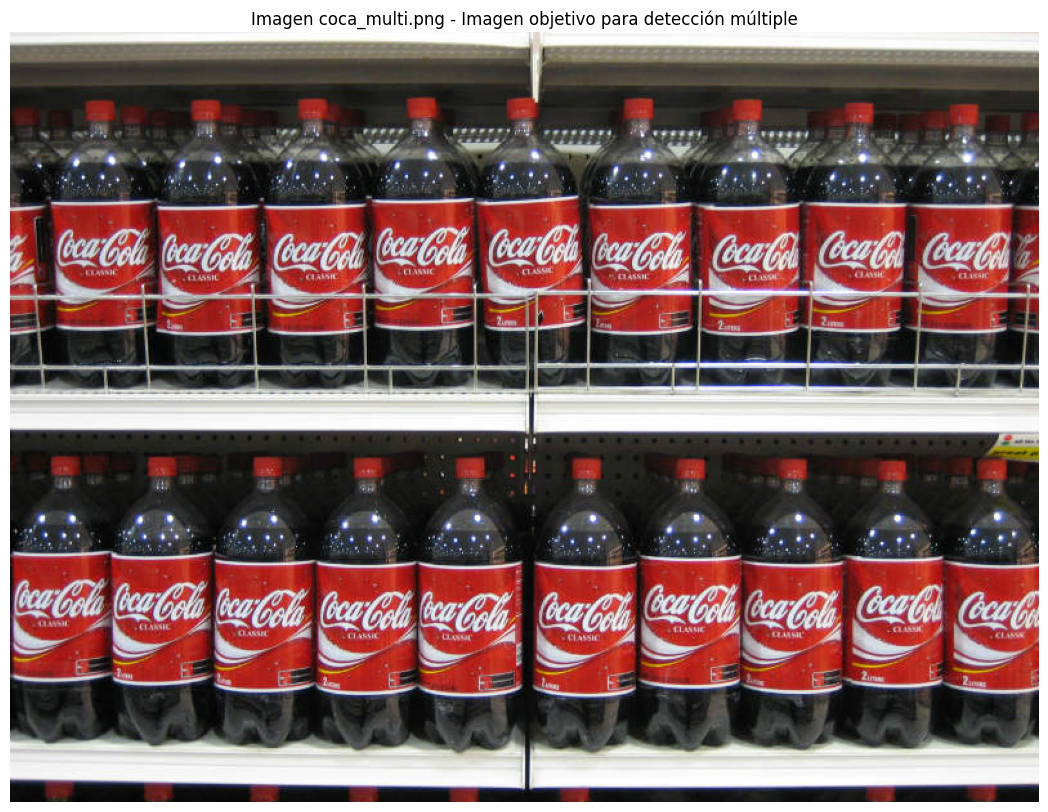

In [11]:
# Verificar que existe la imagen coca_multi.png
ruta_imagen_multi = f"{config['PATH_IMAGENES']}coca_multi.png"
print(f"Buscando imagen: {ruta_imagen_multi}")

if os.path.exists(ruta_imagen_multi):
    print("✓ Imagen coca_multi.png encontrada")
    
    # Cargar y mostrar la imagen
    imagen_multi = cv2.imread(ruta_imagen_multi)
    imagen_multi_rgb = cv2.cvtColor(imagen_multi, cv2.COLOR_BGR2RGB)
    
    print(f"Dimensiones de la imagen: {imagen_multi.shape}")
    
    # Mostrar la imagen
    plt.figure(figsize=(15, 10))
    plt.imshow(imagen_multi_rgb)
    plt.title('Imagen coca_multi.png - Imagen objetivo para detección múltiple')
    plt.axis('off')
    plt.show()
    
else:
    print(f"✗ ERROR: No se encontró la imagen {ruta_imagen_multi}")
    print(f"Verificar que el archivo existe en el directorio especificado.")

## 5. Procesamiento de coca_multi.png

In [16]:
# Procesar la imagen coca_multi.png
if os.path.exists(ruta_imagen_multi):
    print("Iniciando procesamiento de coca_multi.png...")
    # Procesar imagen para múltiples detecciones (usar solo el template procesado con Canny)
    detecciones = procesar_imagen_multi(ruta_imagen_multi, template_canny, config)
    
    print(f"\n✓ Procesamiento completado exitosamente")

        
else:
    print("No se puede procesar: imagen no encontrada.")
    detecciones = []

Iniciando procesamiento de coca_multi.png...


Procesando escalas: 100%|██████████| 3/3 [00:00<00:00,  9.86it/s]




✓ Procesamiento completado exitosamente


## 6. Visualización de resultados

Mostrando 4 imágenes de resultado:


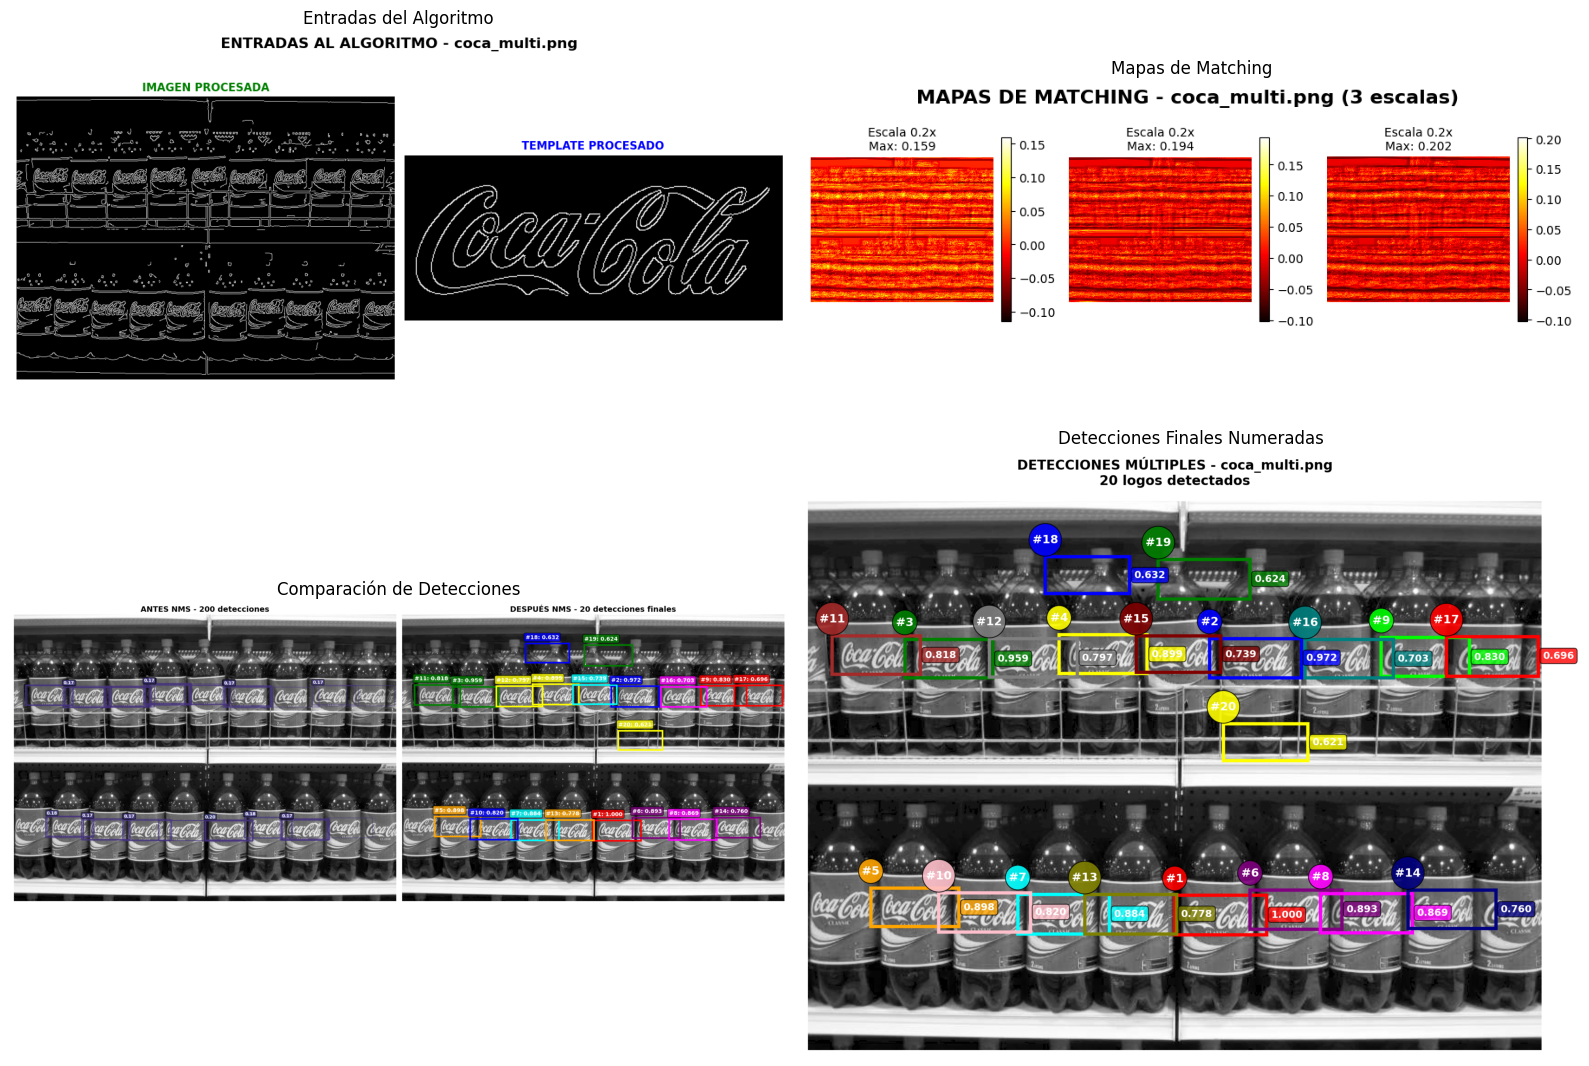

In [17]:
# Mostrar imágenes de resultado generadas
import glob

directorio_resultados = config['CARPETA_RESULTADOS']
if os.path.exists(directorio_resultados):
    # Buscar imágenes específicas de coca_multi
    patrones_busqueda = [
        '*coca_multi*01_entradas_algoritmo.png',
        '*coca_multi*02_mapas_matching.png', 
        '*coca_multi*05_comparacion_detecciones.png',
        '*coca_multi*06_detecciones_finales_numeradas.png'
    ]
    
    imagenes_encontradas = []
    for patron in patrones_busqueda:
        archivos = glob.glob(os.path.join(directorio_resultados, patron))
        imagenes_encontradas.extend(archivos)
    
    if imagenes_encontradas:
        print(f"Mostrando {len(imagenes_encontradas)} imágenes de resultado:")
        
        # Determinar layout de la figura
        num_imgs = len(imagenes_encontradas)
        if num_imgs <= 2:
            rows, cols = 1, num_imgs
            figsize = (8 * num_imgs, 6)
        else:
            rows, cols = 2, 2
            figsize = (16, 12)
        
        fig, axes = plt.subplots(rows, cols, figsize=figsize)
        if num_imgs == 1:
            axes = [axes]
        elif rows == 1:
            axes = axes
        else:
            axes = axes.flatten()
        
        for i, img_path in enumerate(imagenes_encontradas[:4]):  # Máximo 4 imágenes
            img = cv2.imread(img_path)
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            axes[i].imshow(img_rgb)
            nombre_archivo = os.path.basename(img_path)
            
            # Crear título más legible
            if '01_entradas' in nombre_archivo:
                titulo = 'Entradas del Algoritmo'
            elif '02_mapas' in nombre_archivo:
                titulo = 'Mapas de Matching'
            elif '05_comparacion' in nombre_archivo:
                titulo = 'Comparación de Detecciones'
            elif '06_detecciones_finales' in nombre_archivo:
                titulo = 'Detecciones Finales Numeradas'
            else:
                titulo = nombre_archivo
            
            axes[i].set_title(titulo, fontsize=12)
            axes[i].axis('off')
        
        # Ocultar ejes no utilizados
        for i in range(len(imagenes_encontradas), len(axes)):
            axes[i].axis('off')
        
        plt.tight_layout()
        plt.show()
        
    else:
        print("No se encontraron imágenes de resultado específicas para coca_multi.")
        
        # Mostrar cualquier imagen disponible en el directorio
        todas_imagenes = glob.glob(os.path.join(directorio_resultados, '*.png'))
        if todas_imagenes:
            print(f"Imágenes disponibles en {directorio_resultados}:")
            for img in todas_imagenes[:5]:  # Mostrar hasta 5
                print(f"  - {os.path.basename(img)}")
else:
    print(f"Directorio de resultados no encontrado: {directorio_resultados}")